In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20
X = np.random.random(N) * 10 - 5
Y = 0.5 * X - 1 + np.random.randn(N)

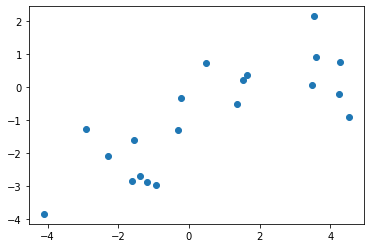

In [3]:
plt.scatter(X, Y);

In [5]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [7]:
# (num samples x num dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
type(inputs)

torch.Tensor

In [ ]:
# Train the model
n_epochs = 30
losses = []

for i in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and Optimize
  loss.backward()
  optimizer.step()